In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

# Problem description
section 4.4 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution

In [3]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [6]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=50)

k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453
k=1, rel_gap=125.42336777713614, L=54.82745735597324, U=6931.471805599453
k=2, rel_gap=45.637075216629036, L=94.07040679772149, U=4387.168637484228
k=3, rel_gap=18.46368266697428, L=148.19230364505984, U=2884.3679718353405
k=4, rel_gap=7.660735754009541, L=225.60242956248715, U=1953.8830279032516
k=5, rel_gap=4.146412363558956, L=272.09640292135225, U=1400.3202920743665
k=6, rel_gap=3.0513947393144223, L=345.63906560024043, U=1400.3202920743665
k=7, rel_gap=1.9640305730382934, L=375.6772114108227, U=1113.5187402154488
k=8, rel_gap=1.561435785076918, L=434.72444115244946, U=1113.5187402154488
k=9, rel_gap=1.3483981180503317, L=474.16097451990186, U=1113.5187402154488
k=10, rel_gap=1.1341081891180866, L=499.5006702813931, U=1065.9884709174944
k=11, rel_gap=0.836225280994285, L=539.5800155070893, U=990.7904655934058
k=12, rel_gap=0.643192166158615, L=602.9668872567922, U=990.7904655934058
k=13, rel_gap=0.534

# Centralized solution

In [7]:
x_cvx, prob_cvx, h_cvx = ob.cvx_federated_learning(params=params)

In [8]:
h_cvx, prob.upper_bnd[-1]

(923.1097805556175, 924.4043093020596)

# Plot

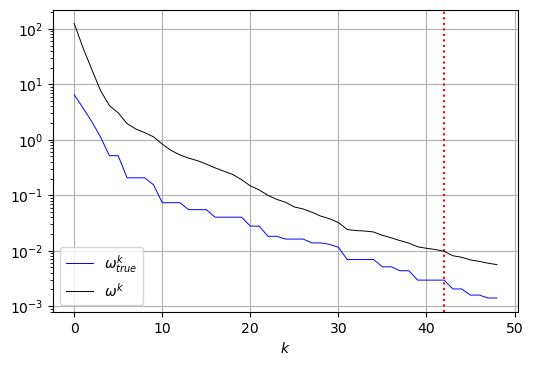

In [15]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)